In [15]:
## Import
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
## Generate data
X,Y=make_classification(n_features=5,n_informative=5,n_redundant=0,n_clusters_per_class=1)

In [4]:
## Create Dataframe
data=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
data['target']=Y
print(data.shape)
data.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.007653,-1.246185,1.691349,-2.109418,0.298738,1
1,-0.209084,1.220263,0.226401,-1.409966,-2.698197,0
2,-0.443501,-1.757321,0.651895,-1.149928,-1.886053,0
3,-1.790115,-0.027632,-0.368275,-1.516591,-1.460883,0
4,-1.847807,-1.413375,0.614231,-1.379322,-0.029749,0


### Bagging Classifer

In [5]:
## If we do not pass the base_estimator then base_estimator will be considered as Decision Tree by default
bag_model=BaggingClassifier(max_features=2)

In [7]:
## Fit
bag_model.fit(data.iloc[:,:-1],data.iloc[:,-1])

BaggingClassifier(max_features=2)

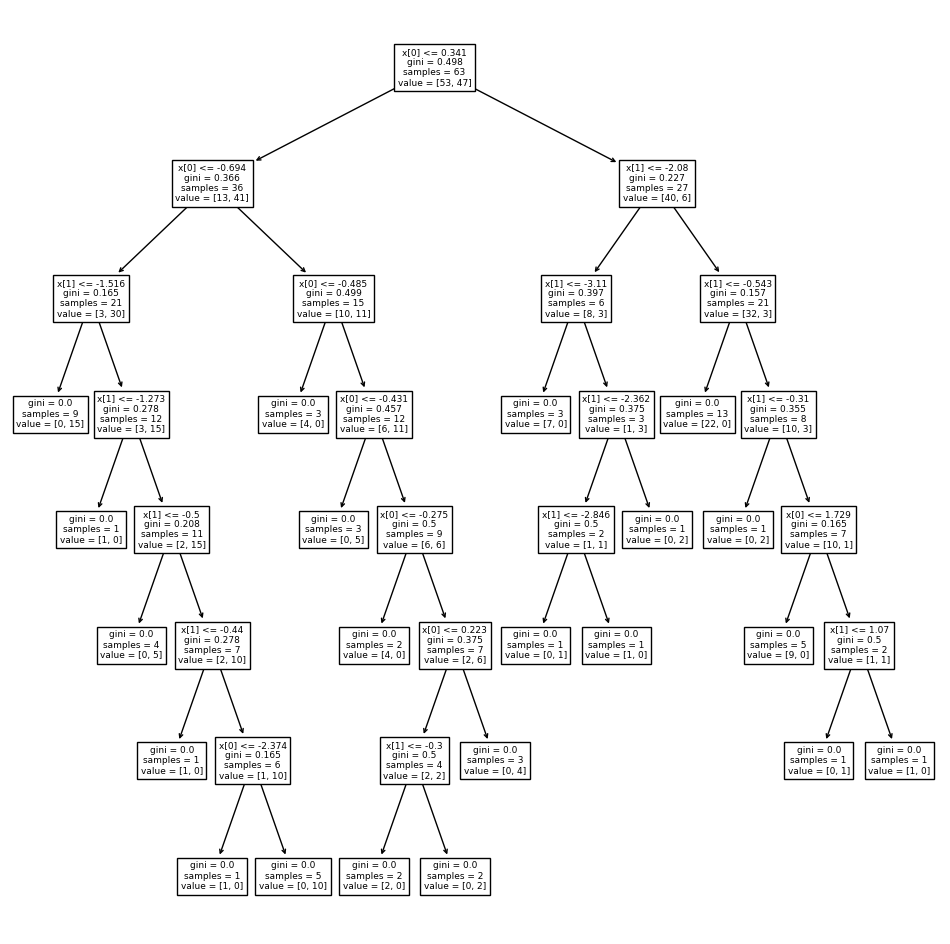

In [16]:
## Plot Tree
plt.figure(figsize=(12,12))
plot_tree(bag_model.estimators_[0])
plt.show()

Here we could see tree level sampling. Before constructing decision tree the columns 0 and 1 are selected here and using these 2 columns only all the nodes will be created.

### Random Forest

In [17]:
## Initialze
RF=RandomForestClassifier(max_features=2)

In [19]:
## Fit
RF.fit(data.iloc[:,:-1],data.iloc[:,-1])

RandomForestClassifier(max_features=2)

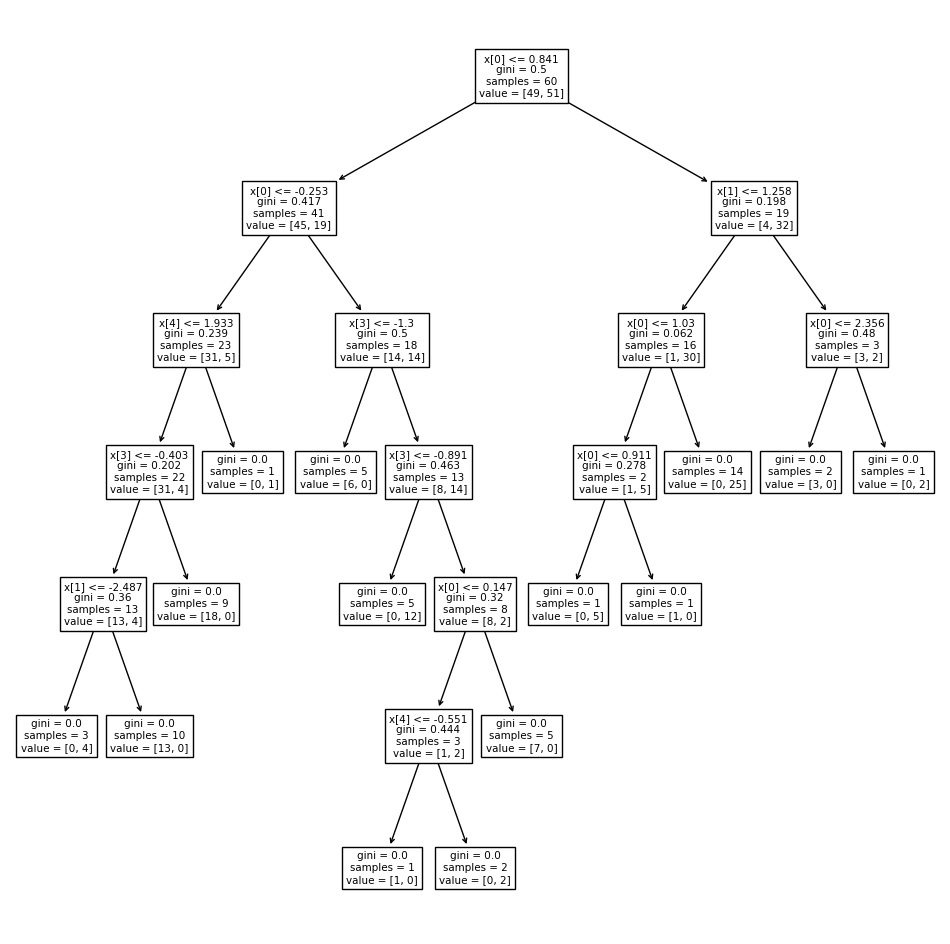

In [20]:
## Plot Tree
plt.figure(figsize=(12,12))
plot_tree(RF.estimators_[0])
plt.show()

Here we could see randomly different columns are selected. That means at each node the column sampling is happening. This introduces randomness in model. Thus random forest creates variety of data and end up in performing well.